In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR

In [6]:
data=pd.read_csv("/Users/chohan/Desktop/ML_DL_ Hackathon/Kaggle_Problem(Car Price Prediction)\cardata.csv",delimiter=",")

In [7]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
data.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [9]:
data.count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
print(data["Car_Name"].unique())
print(len(data["Car_Name"].unique()))

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [26]:
print(data["Year"].unique())
print(len(data["Year"].unique()))

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
16


In [27]:
print(data["Selling_Price"].unique())
print(len(data["Selling_Price"].unique()))

[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25  5.11  2.7
  6.15 11.45  3.9   9.1   4.8   2.    5.35  6.25  5.95  5.2   3.75 12.9
  5.    5.4   7.2  10.25  8.5   8.4   9.15  6.6   3.65  8.35  6.7   5.3
 10.9   8.65  9.7   2.1   8.99  7.4   5.65 10.11  6.4   8.55  9.5  11.5 ]
156


In [28]:
print(data["Present_Price"].unique())
print(len(data["Present_Price"].unique()))

[ 5.59   9.54   9.85   4.15   6.87   9.83   8.12   8.61   8.89   8.92
  3.6   10.38   9.94   7.71   7.21  10.79   5.09   7.98   3.95   5.71
  8.01   3.46   4.41   4.99   5.87   6.49   5.98   4.89   7.49   9.95
  8.06   7.74   7.2    2.28   3.76   7.87   3.98   7.15   2.69  12.04
  9.29  30.61  19.77  10.21  15.04   7.27  18.54   6.8   35.96  18.61
  7.7   36.23   6.95  23.15  20.45  13.74  20.91   6.76  12.48   8.93
 14.68  12.35  22.83  14.89   7.85  25.39  13.46  23.73  92.6    6.05
 16.09  13.7   22.78  18.64   1.9    1.82   1.78   1.6    1.47   2.37
  3.45   1.5    2.4    1.4    1.26   1.17   1.75   0.95   0.8    0.87
  0.84   0.82   0.81   0.74   1.2    0.787  0.99   0.94   0.826  0.55
  0.88   0.51   0.52   0.54   0.73   0.83   0.64   0.72   1.05   0.57
  0.48   0.58   0.47   0.75   0.65   0.32   6.79   5.7    4.6    4.43
  7.13   8.1   14.79  13.6    9.4    7.6    9.9    6.82   5.35   7.
  5.97   5.8    8.7   10.     7.5    8.4    5.9   14.    11.8    8.5
  7.9    6.4    6.1   1

In [30]:
print(data["Kms_Driven"].unique())
print(len(data["Kms_Driven"].unique()))

[ 27000  43000   6900   5200  42450   2071  18796  33429  20273  42367
   2135  51000  15000  26000  77427  41678  35500  41442  25000   2400
  50000  45280  56879  20000  55138  16200  44542  45000  51439  54200
  39000  49998  48767 127000  10079  62000  24524  46706  58000  45780
  64532  65000  25870  37000 104707  40000 135000  90000  70000  40534
  39485  41000  40001  40588  78000  47000   6000  11000  59000  88000
  12000  71000  56001  83000  36000  72000 135154  80000  89000  23000
  38000 197176 142000  56000  58242  75000  29000   8700  50024   3000
   1400   4000   1200   4100  21700  16500  18000   7000  35000  17000
  17500  33000  14000   5400   5700  46500  11500   1300   5000   3500
    500  11800  23500  16000  16600  32000  19000  24000  31000  13000
   8000   4300   8600  14500   1000  42000   5500   6700  13700  38600
  30000 213000  60000  21000   1900  22000  55000  49000 500000  53000
  92233  28200  53460  28282   3493  12479  34797   3435  21125  35775
  4353

In [31]:
print(data["Fuel_Type"].unique())
print(len(data["Fuel_Type"].unique()))

['Petrol' 'Diesel' 'CNG']
3


In [32]:
print(data["Seller_Type"].unique())
print(len(data["Seller_Type"].unique()))

['Dealer' 'Individual']
2


In [33]:
print(data["Transmission"].unique())
print(len(data["Transmission"].unique()))

['Manual' 'Automatic']
2


In [34]:
print(data["Owner"].unique())
print(len(data["Owner"].unique()))

[0 1 3]
3


In [35]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [45]:
data["Current_year"]=2020

In [47]:
data["no_of_Year"]=data["Current_year"]-data["Year"]

In [49]:
data.drop(columns=["Current_year","Year"],axis=1,inplace=True)

In [51]:
data.drop(columns=["Car_Name"],axis=1,inplace=True)

In [71]:
#Preprocessing
data=pd.get_dummies(data,drop_first="first")

In [74]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


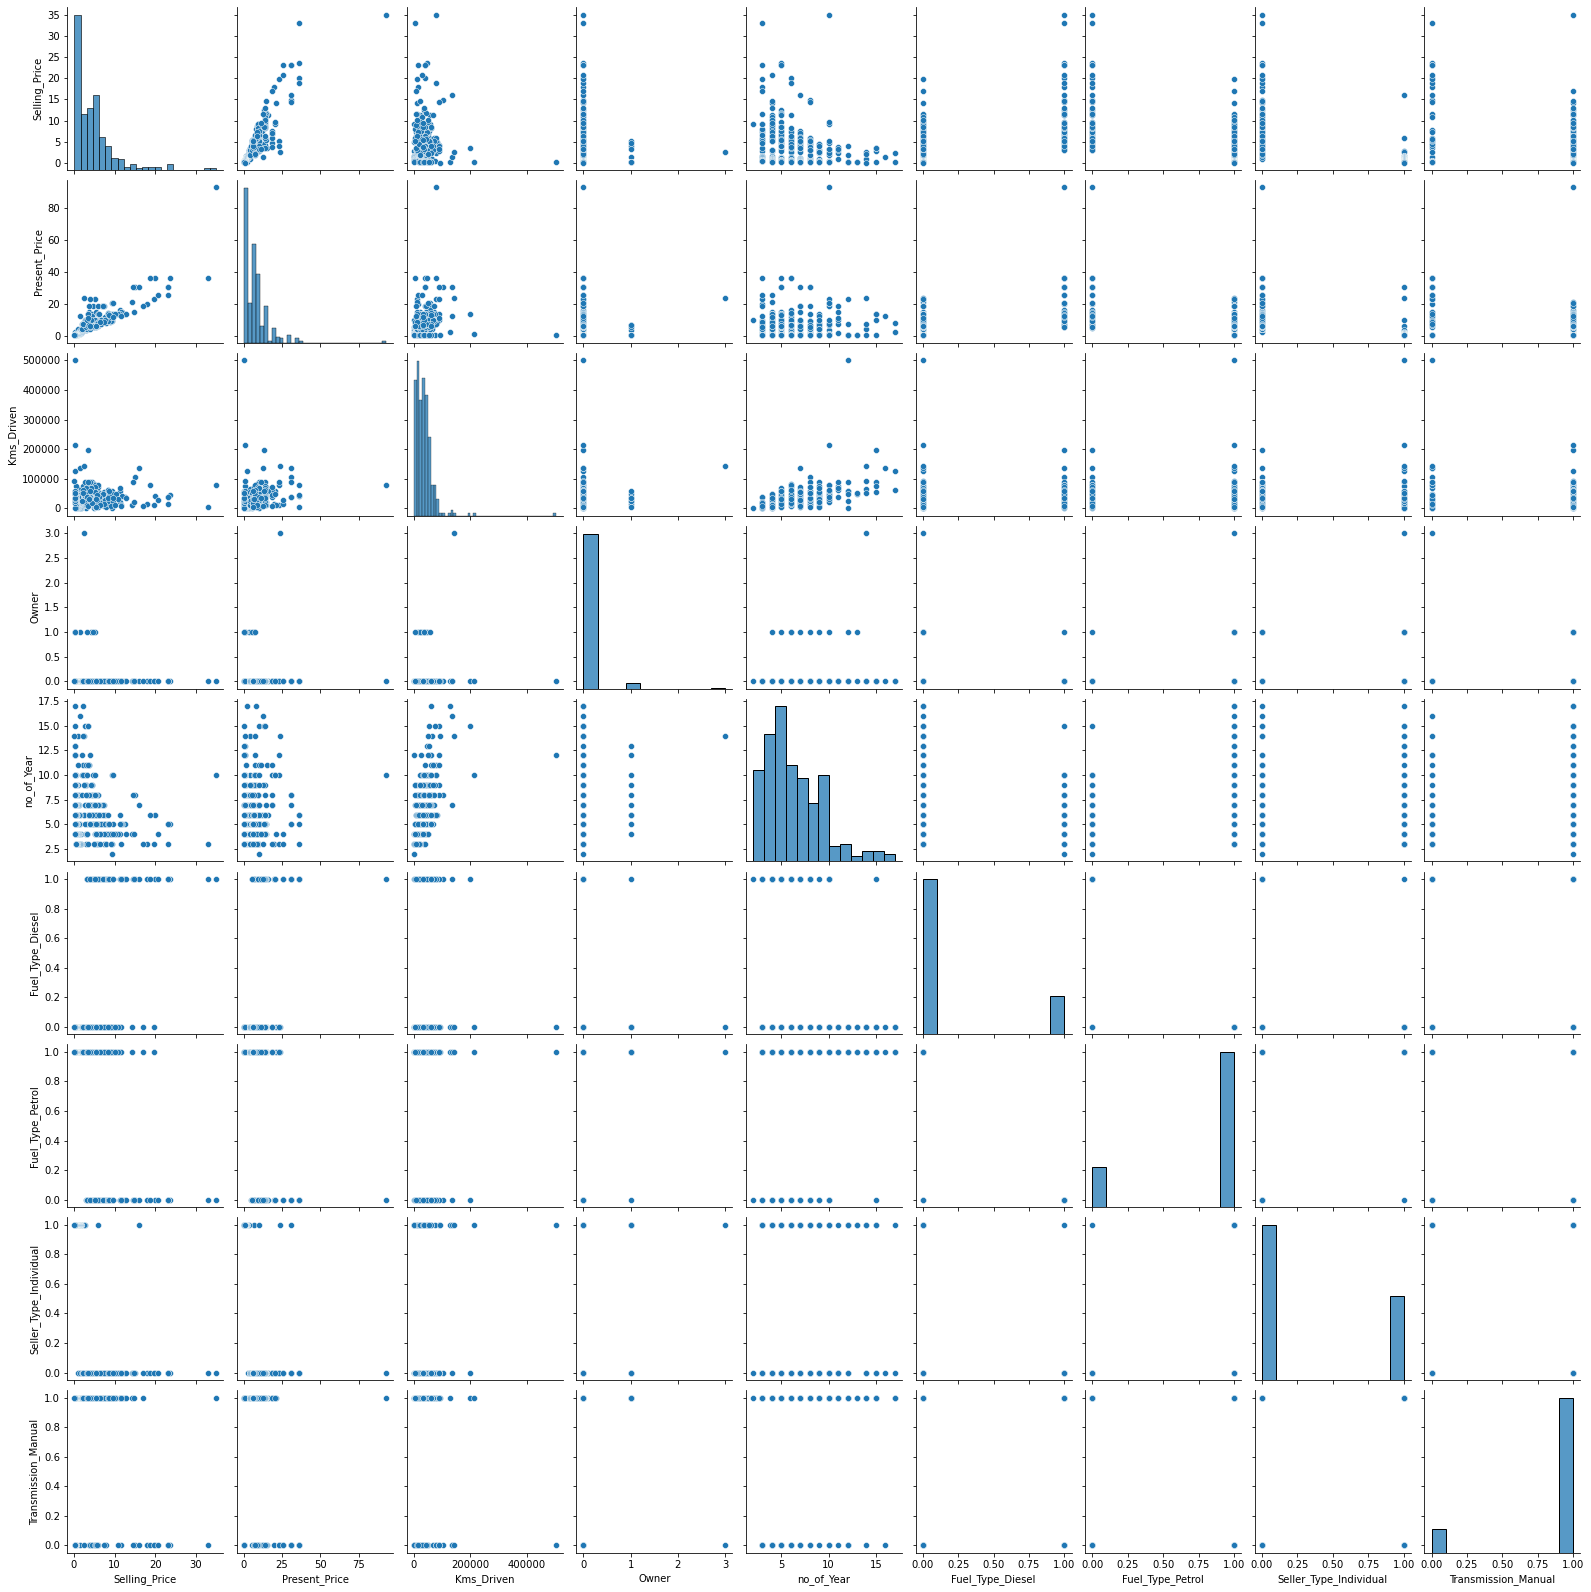

In [75]:
sns.pairplot(data)

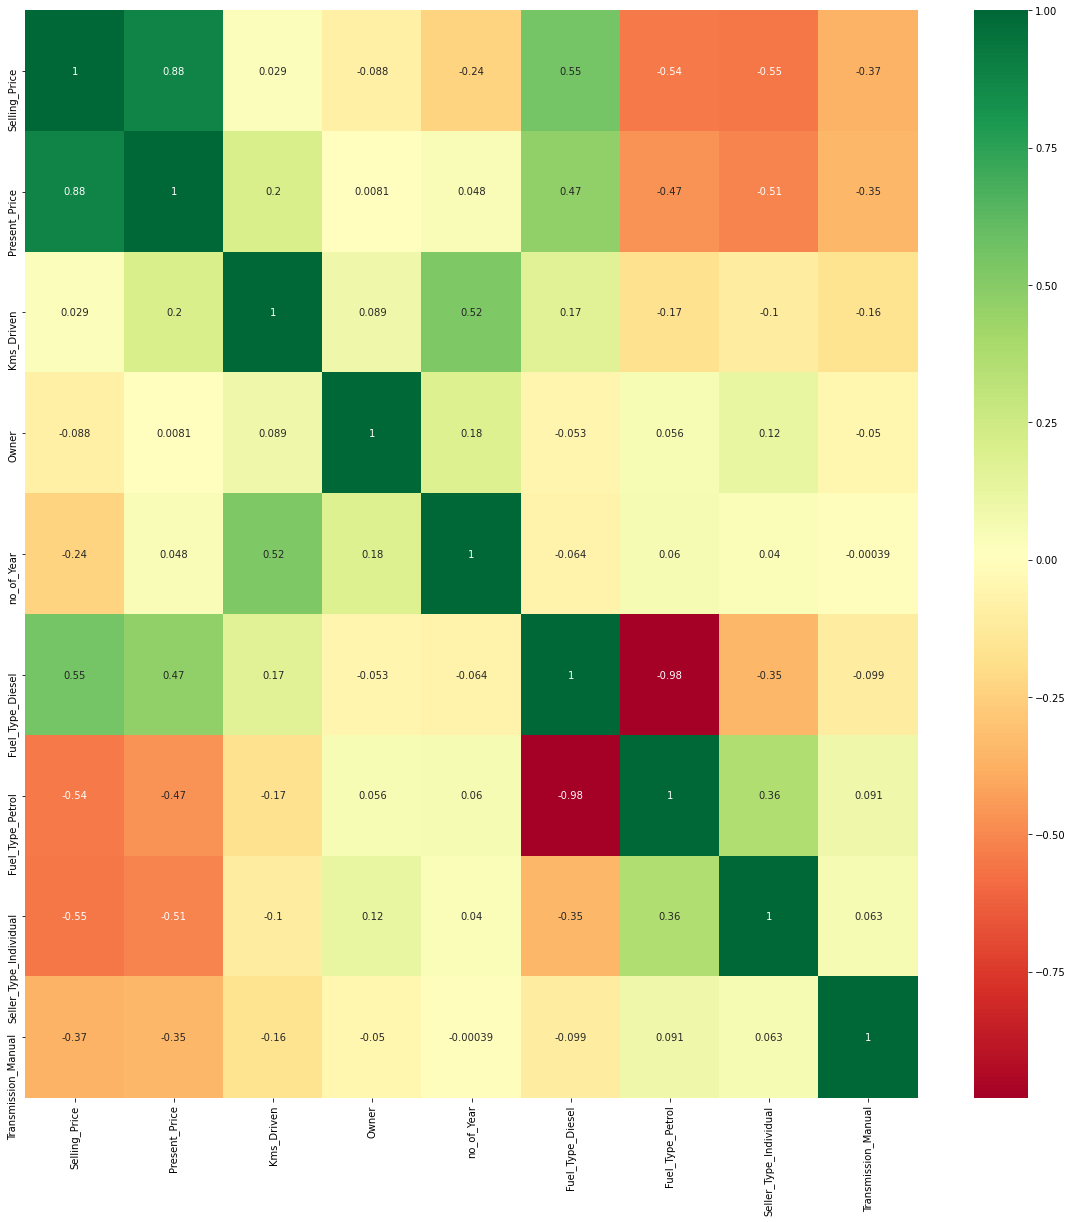

In [77]:
import matplotlib.pyplot as plt
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#Plot Heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [78]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [79]:
data.shape

(301, 9)

In [82]:
X=data.iloc[:,1:9]

In [85]:
Y=data.iloc[:,0]

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=True)

# Linear_Regression

In [118]:
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [134]:
print(linear_model.score(X_train,Y_train))

0.8905747878025386


In [131]:
prediction=linear_model.predict(X_test)

In [133]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))


MAE: 1.1782028069641934
MSE: 3.8192565708930832
RMSE: 1.9542918336044601


# SVM_Regression

In [120]:
SVM_model=SVR(kernel="rbf")
SVM_model.fit(X_train,Y_train)

SVR()

In [135]:
print(SVM_model.score(X_train,Y_train))

-0.08058339902129785


In [136]:
predictions=SVM_model.predict(X_test)

In [138]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 2.33196752344138
MSE: 8.04731102500419
RMSE: 2.836778282665776


# Decision_tree_Regression

In [122]:
DTR_model=DecisionTreeRegressor()
DTR_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [139]:
print(DTR_model.score(X_train,Y_train))

1.0


In [140]:
predictions=DTR_model.predict(X_test)

In [142]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.5451612903225809
MSE: 0.5441548387096775
RMSE: 0.7376685154659086


# Random_forest_Regression

In [124]:
RFR_model=RandomForestRegressor(n_estimators=50)
RFR_model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

In [144]:
print(RFR_model.score(X_train,Y_train))

0.985962999508876


In [147]:
predictions=RFR_model.predict(X_test)

In [148]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.7979677419354836
MSE: 4.68852948516129
RMSE: 2.1653012458226892


# Gradient_Boost_Regression

In [126]:
gradient_boost_model=GradientBoostingRegressor(n_estimators=100,
    subsample=1.0,
    criterion='mse',)
gradient_boost_model.fit(X_train,Y_train)

GradientBoostingRegressor(criterion='mse')

In [149]:
print(gradient_boost_model.score(X_train,Y_train))

0.9963551454607856


In [150]:
predictions=gradient_boost_model.predict(X_test)

In [151]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.5633007306238226
MSE: 1.564820817264575
RMSE: 1.2509279824452626


# Ada_Boost_Regression

In [128]:
adaboost_model=AdaBoostRegressor()
adaboost_model.fit(X_train,Y_train)

AdaBoostRegressor()

In [152]:
print(adaboost_model.score(X_train,Y_train))

0.9715489544058288


In [153]:
predictions=adaboost_model.predict(X_test)

In [154]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1.0836629985999138
MSE: 5.428546757383085
RMSE: 2.329924195630211
